In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [110]:
#READING THE DATASET
df = pd.read_csv('HOUSING DATASET.csv')
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,WoodDeckSF,OpenPorchSF,TotalBsmtSF,FloorSF,SalePrice
0,60,65.0,8450,7,0,61,856,104678.0,208500
1,20,80.0,9600,6,298,0,1262,91381.0,181500
2,60,68.0,11250,7,0,42,920,112210.0,223500
3,70,60.0,9550,7,0,35,756,70378.0,140000
4,60,84.0,14260,8,192,84,1145,125572.5,250000


In [111]:
df.shape

(1460, 9)

In [112]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,WoodDeckSF,OpenPorchSF,TotalBsmtSF,FloorSF,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,94.244521,46.660274,1057.429452,90989.312671,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,125.338794,66.256028,438.705324,39856.218336,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,17810.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,0.000000,0.000000,795.750000,65421.500000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,0.000000,25.000000,991.500000,82136.250000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,168.000000,68.000000,1298.250000,107540.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,857.000000,547.000000,6110.000000,378722.000000,755000.000000


In [113]:
#CHECKING NULL VALUES
df.isnull().sum()

MSSubClass       0
LotFrontage    259
LotArea          0
OverallQual      0
WoodDeckSF       0
OpenPorchSF      0
TotalBsmtSF      0
FloorSF          0
SalePrice        0
dtype: int64

In [114]:
#HANDLING NULL VALUES
df = df.dropna(axis=0)
df.isnull().sum()

MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
WoodDeckSF     0
OpenPorchSF    0
TotalBsmtSF    0
FloorSF        0
SalePrice      0
dtype: int64

In [115]:
X = df[['MSSubClass' , 'LotFrontage', 'LotArea', 'OverallQual', 'WoodDeckSF', 'OpenPorchSF', 'FloorSF', 'TotalBsmtSF']]
y = df['SalePrice']

In [116]:
#SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [117]:
#APPLYING LINEAR REGRESSION MODEL
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [118]:
print(lm.intercept_)
print(lm.coef_)

206390.9100096663
[-4.61371273e+01 -9.90693734e+00 -1.54459441e+00 -3.33486378e+03
 -1.37531301e+01 -2.51038979e+01  3.38842015e-01 -1.29359527e+01]


In [119]:
#PREDICTING THE PRICE
y_predict=lm.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
242,79000,179976.650086
400,245500,183165.751512
54,130000,170499.130451
316,260000,172693.157336
748,260400,186600.737846
...,...,...
65,317000,182804.267241
601,141000,164134.026785
826,109500,181169.454006
1099,157000,154065.011959


In [120]:
predictions=linreg.predict(x_test)


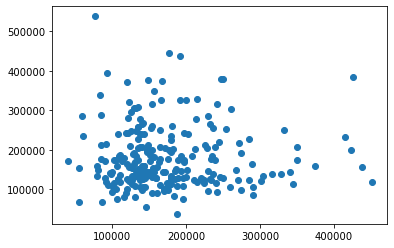

In [121]:
#PLOTTING THE DATA
plt.scatter(y_test,predictions)

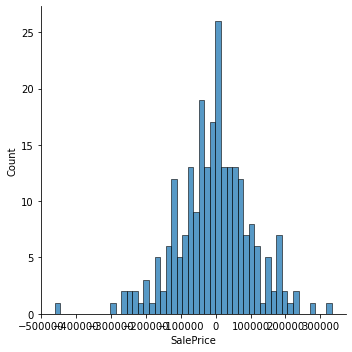

In [122]:
import seaborn as sns
sns.displot((y_test-predictions),bins=50); 

In [123]:
#FINDING THE ERRORS
from sklearn import metrics
#ACCURACY OF TRAIN DATA
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

Mean Absolute Error: 79893.85062240661
Mean Squared Error: 11477426010.622393
Root Mean Squared Error: 107132.74947756354


In [124]:
#ACCURACY OF TEST DATA
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 57975.92530210756
Mean Squared Error: 5665424205.955406
Root Mean Squared Error: 75269.01225574444


In [125]:
#APPLYING RANDOM FOREST 
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf=RandomForestRegressor(n_estimators=100, max_depth=20)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20)

In [127]:
y_predict=rf.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
242,79000,151908.639163
400,245500,213624.310195
54,130000,185298.516667
316,260000,189239.054688
748,260400,202115.396667
...,...,...
65,317000,185996.679524
601,141000,199361.826667
826,109500,182025.143094
1099,157000,153826.794762


In [128]:
y_train_predict = rf.predict(x_train)
#Accuracy of train data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

Mean Absolute Error: 25685.277779998014
Mean Squared Error: 1178562276.687957
Root Mean Squared Error: 34330.19482449753


In [129]:
#Accuracy of test data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 63228.07436272908
Mean Squared Error: 6681126003.406032
Root Mean Squared Error: 81738.15512602442
